### Univariate linear regression in PyTorch

In [330]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [338]:
dtype = torch.float64
df = pd.read_csv("data/ex1data1.txt", names=['sqf', 'price'], header=None)

In [339]:
X = torch.zeros(len(df), 2, dtype=dtype)
X[:, 0] = 1.0 # for intercept
X[:, 1] = torch.FloatTensor(df["sqf"])
y = torch.zeros(len(df), 1, dtype=dtype)
y[:, 0] = torch.FloatTensor(df["price"])

9.115135803550986


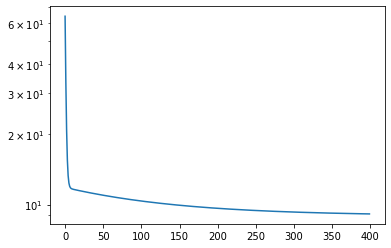

In [341]:
# Manual optimizer
lr = 1e-2
theta = torch.zeros(2, 1, dtype=dtype, requires_grad=True)
loss_hist = []
for _ in range(400):
    pred = torch.mm(X, theta)
    loss = ((pred - y)**2).sum()/len(X)
    loss_hist.append(loss.item())
    loss.backward()
    with torch.no_grad():
        theta -= lr * theta.grad
        theta.grad.zero_()

# Plot loss history
plt.plot(loss_hist)
plt.yscale("log")
print(loss.item())

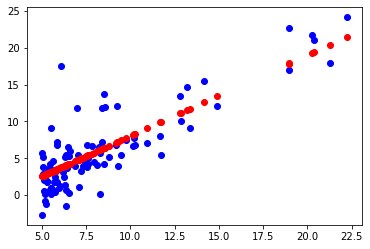

In [342]:
# Plot sqf x price for ground truth and predicted
plt.plot(df["sqf"], df["price"], 'bo')
plt.plot(df["sqf"], pred.detach().numpy(), 'ro')

9.115135803550986


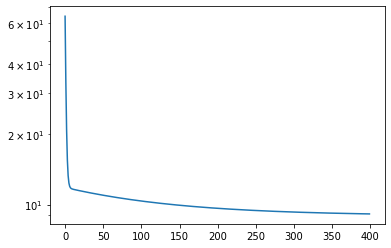

In [343]:
# Built-in optimizer
lr = 1e-2
theta = torch.zeros(2, 1, dtype=dtype, requires_grad=True)
optimizer = torch.optim.SGD([theta], lr=lr)
loss_hist = []
for _ in range(400):
    pred = torch.mm(X, theta)
    loss = ((pred - y)**2).sum()/len(X)
    optimizer.zero_grad()
    loss_hist.append(loss.item())
    loss.backward()
    optimizer.step()
    
# Plot loss history
plt.plot(loss_hist)
plt.yscale("log")
print(loss.item())